In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 100
from scipy import stats

In [2]:
dca = pd.read_csv('../src/dca_291118.csv')
dla_1 = pd.read_csv('../src/LTE-FDD_traffic_Grid_2018113009523030927/LTE-FDD_traffic_Grid_2018113009523030927.csv')
dla_2 = pd.read_csv('../src/LTE-FDD_traffic_Grid_2018113009523030927/LTE-FDD_traffic_Grid_2018113009523030927_1.csv')
dla = pd.concat([dla_1,dla_2],axis=0)
del dla_1,dla_2

In [3]:
dca.set_index(['Latitude','Longitude'],inplace=True)
dla.set_index(['Latitude','Longitude'],inplace=True)

In [4]:
df = dca.join(dla,how='inner',lsuffix='_dca',rsuffix='_dla')

In [5]:
del dca,dla

In [6]:
df.drop('MR Count_dla',axis=1,inplace=True)

In [7]:
df.head()

RSRP(All MRs) (dBm)  MR Count_dca  \
Latitude  Longitude                                       
13.461036 100.858384               -103.0             1   
13.461486 100.848189                -95.0             1   
          100.851897               -104.0             1   
          100.863018                -83.5             2   
13.461935 100.864408                -94.0             1   

                      DL Traffic Volume (MB)  UL Traffic Volume (MB)  \
Latitude  Longitude                                                    
13.461036 100.858384                   0.009                   0.031   
13.461486 100.848189                   0.002                   0.004   
          100.851897                   0.000                   0.000   
          100.863018                   0.704                   0.062   
13.461935 100.864408                   0.000                   0.000   

                      Total Traffic Volume (MB)  \
Latitude  Longitude                               
13.461036 100.858384                      0.040   
13.461486 100.848189                      0.006   
          100.851897                      0.000   
          100.863018                      0.766   
13.461935 100.864408                      0.000   

                      UL Traffic Volume of Small Traffic Services (MB)  \
Latitude  Longitude                                                      
13.461036 100.858384                                             0.004   
13.461486 100.848189                                             0.003   
          100.851897                                             0.000   
          100.863018                                             0.053   
13.461935 100.864408                                             0.000   

                      Average DL Throughput (kbit/s)  \
Latitude  Longitude                                    
13.461036 100.858384                        1837.499   
13.461486 100.848189                        2992.187   
          100.851897                             NaN   
          100.863018                        9197.544   
13.461935 100.864408                             NaN   

                      DL Low-Throughput Ratio(%)  \
Latitude  Longitude                                
13.461036 100.858384                       100.0   
13.461486 100.848189                       100.0   
          100.851897                         NaN   
          100.863018                         0.0   
13.461935 100.864408                         NaN   

                      Average UL Throughput (kbit/s)  \
Latitude  Longitude                                    
13.461036 100.858384                        3348.880   
13.461486 100.848189                       13164.062   
          100.851897                             NaN   
          100.863018                       12480.468   
13.461935 100.864408                             NaN   

                      UL Low-Throughput Ratio(%)  DL Packet Loss Rate (%)  \
Latitude  Longitude                                                         
13.461036 100.858384                         0.0                      0.0   
13.461486 100.848189                         0.0                      0.0   
          100.851897                         NaN                      0.0   
          100.863018                         0.0                      0.0   
13.461935 100.864408                         NaN                      0.0   

                      UL Packet Loss Rate (%)  DL IBLER (%)  UL IBLER (%)  \
Latitude  Longitude                                                         
13.461036 100.858384                      0.0         46.04          6.80   
13.461486 100.848189                      0.0         76.54          8.65   
          100.851897                      NaN         76.19         20.00   
          100.863018                      0.0         18.30          0.77   
13.461935 100.864408                      NaN          6.90         12.50

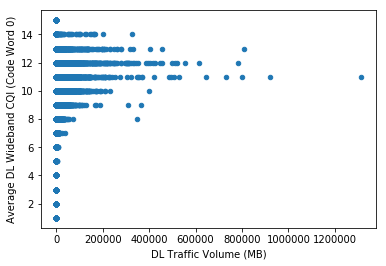

In [10]:
df.plot('DL Traffic Volume (MB)','Average DL Wideband CQI (Code Word 0)',kind='scatter')

In [12]:
df.describe()

,RSRP(All MRs) (dBm),MR Count_dca,DL Traffic Volume (MB),UL Traffic Volume (MB),Total Traffic Volume (MB),UL Traffic Volume of Small Traffic Services (MB),Average DL Throughput (kbit/s),DL Low-Throughput Ratio(%),Average UL Throughput (kbit/s),UL Low-Throughput Ratio(%),DL Packet Loss Rate (%),UL Packet Loss Rate (%),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),Average DL Wideband CQI (Code Word 0),Average DL Wideband CQI (Code Word 1),DL Spectrum Efficiency (Byte/RB),UL Spectrum Efficiency (Byte/RB),Average DL RB Quantity,Average UL RB Quantity,Rank 2 Percentage(%),Number of Subscribers,Percentage of QCI 1 (%),Percentage of QCI 2 (%),Percentage of QCI 3 (%),Percentage of QCI 4 (%),Percentage of QCI 5 (%),Percentage of QCI 6 (%),Percentage of QCI 7 (%),Percentage of QCI 8 (%),Percentage of QCI 9 (%)
count,1.907158e+06,1.907158e+06,1.907158e+06,1.907158e+06,1.907158e+06,1.907158e+06,1.887874e+06,1.887874e+06,1.877230e+06,1.877230e+06,1.907158e+06,1.904893e+06,1.906872e+06,1.906872e+06,1.907158e+06,1.907158e+06,1.906929e+06,1.829089e+06,1.906872e+06,1.906762e+06,1.906872e+06,1.906712e+06,1.906872e+06,1.907158e+06,1.907158e+06,1.907158e+06,1.907158e+06,1907158.0,1.907158e+06,1.907158e+06,1.907158e+06,1.907158e+06,1.907158e+06
mean,-9.604625e+01,3.727222e+03,7.710393e+02,6.941738e+01,8.404567e+02,5.065636e+01,8.860379e+03,4.695644e+01,3.607447e+03,1.828777e+01,3.345648e-03,2.352914e-03,1.463131e+01,6.948870e+00,1.219624e+01,2.334224e+01,8.847305e+00,8.607813e+00,2.899759e+01,2.130316e+01,1.998703e+01,2.941992e+00,2.997777e+01,1.580295e+02,2.249022e-01,1.119152e-04,1.242687e-06,0.0,1.626551e+01,1.022698e-02,7.336188e+00,7.611114e+01,5.184463e-02
std,6.053431e+00,2.428058e+04,4.313375e+03,4.631301e+02,4.760985e+03,3.065713e+02,3.968465e+03,1.800151e+01,1.638205e+03,1.329449e+01,3.195088e-01,1.492494e-01,6.571110e+00,4.067561e+00,3.276730e+00,3.454528e+00,1.386598e+00,1.662129e+00,2.037794e+01,1.285615e+01,6.785602e+00,1.944098e+00,1.908392e+01,4.286701e+02,2.393202e+00,2.178347e-02,1.587197e-03,0.0,1.264138e+01,6.098204e-01,1.221282e+01,1.782259e+01,1.244582e+00
min,-1.310000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.550000e-01,0.000000e+00,2.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.001200e+02,8.100000e+01,1.571700e+01,1.278000e+00,1.731200e+01,1.007000e+00,6.505636e+03,3.750000e+01,2.646178e+03,1.250000e+01,0.000000e+00,0.000000e+00,1.193000e+01,4.800000e+00,1.000000e+01,2.300000e+01,8.000000e+00,8.000000e+00,2.128000e+01,1.593000e+01,1.600000e+01,2.000000e+00,1.592000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000e+00,0.000000e+00,5.000000e-01,6.599000e+01,0.000000e+00
50%,-9.630000e+01,5.610000e+02,1.062415e+02,8.866000e+00,1.158500e+02,6.661000e+00,8.392336e+03,4.581000e+01,3.589113e+03,1.630000e+01,0.000000e+00,0.000000e+00,1.348000e+01,6.240000e+00,1.200000e+01,2.400000e+01,9.000000e+00,9.000000e+00,2.723000e+01,2.076000e+01,1.900000e+01,2.000000e+00,2.750000e+01,4.100000e+01,4.000000e-02,0.000000e+00,0.000000e+00,0.0,1.557000e+01,0.000000e+00,3.970000e+00,7.693000e+01,0.000000e+00
75%,-9.207000e+01,2.712000e+03,5.074515e+02,4.340000e+01,5.525910e+02,3.204700e+01,1.059350e+04,5.513000e+01,4.456553e+03,2.097000e+01,0.000000e+00,0.000000e+00,1.518000e+01,8.080000e+00,1.400000e+01,2.500000e+01,1.000000e+01,1.000000e+01,3.476000e+01,2.606000e+01,2.300000e+01,4.000000e+00,4.157000e+01,1.560000e+02,1.300000e-01,0.000000e+00,0.000000e+00,0.0,2.493000e+01,0.000000e+00,8.600000e+00,8.945000e+01,0.000000e+00
max,-6.164000e+01,1.001405e+07,1.310663e+06,1.684336e+05,1.479097e+06,1.023697e+05,1.785744e+05,1.000000e+02,5.778125e+04,1.000000e+02,1.000000e+02,

In [20]:
feat_cat = {'coverage':['RSRP(All MRs) (dBm)'],\
            'traffic':['MR Count_dca','DL Traffic Volume (MB)','UL Traffic Volume (MB)',\
            'Total Traffic Volume (MB)','UL Traffic Volume of Small Traffic Services (MB)',\
            'DL Spectrum Efficiency (Byte/RB)','UL Spectrum Efficiency (Byte/RB)',\
            'Average DL RB Quantity','Average UL RB Quantity','Number of Subscribers',\
            ]+[f'Percentage of QCI {i} (%)' for i in range(1,10)],\
            'experience':['Average DL Throughput (kbit/s)','DL Low-Throughput Ratio(%)',\
                          'Average UL Throughput (kbit/s)','UL Low-Throughput Ratio(%)'],\
            'quality':['DL Packet Loss Rate (%)','UL Packet Loss Rate (%)','DL IBLER (%)','UL IBLER (%)',\
                      'DL MCS (only for Initial Transmission)','UL MCS (only for Initial Transmission)',\
                      'Average DL Wideband CQI (Code Word 0)','Average DL Wideband CQI (Code Word 1)',\
                      'Rank 2 Percentage(%)']}

In [16]:
for col in df.columns:
    if np.sum(df[col].isna()) >0:
        print(f'{col} filled...')
        df[col] = df[col].fillna(np.nanmedian(df[col]))

Average DL Throughput (kbit/s) filled...
DL Low-Throughput Ratio(%) filled...
Average UL Throughput (kbit/s) filled...
UL Low-Throughput Ratio(%) filled...
UL Packet Loss Rate (%) filled...
DL IBLER (%) filled...
UL IBLER (%) filled...
Average DL Wideband CQI (Code Word 0) filled...
Average DL Wideband CQI (Code Word 1) filled...
DL Spectrum Efficiency (Byte/RB) filled...
UL Spectrum Efficiency (Byte/RB) filled...
Average DL RB Quantity filled...
Average UL RB Quantity filled...
Rank 2 Percentage(%) filled...


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df.values)

100%|██████████| 10/10 [27:04<00:00, 248.33s/it]


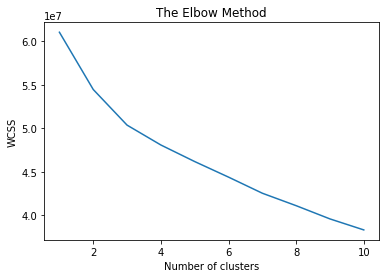

In [18]:
from sklearn.cluster import KMeans
from tqdm import trange
wcss = []
for i in trange(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# let's select 7 cluster
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [23]:
df['cluster'] = kmeans.labels_

In [ ]:
df.to_csv('../out/df_cluster.csv')

In [2]:
df = pd.read_csv('../out/df_cluster.csv')

In [3]:
df.head()

,Latitude,Longitude,RSRP(All MRs) (dBm),MR Count_dca,DL Traffic Volume (MB),UL Traffic Volume (MB),Total Traffic Volume (MB),UL Traffic Volume of Small Traffic Services (MB),Average DL Throughput (kbit/s),DL Low-Throughput Ratio(%),Average UL Throughput (kbit/s),UL Low-Throughput Ratio(%),DL Packet Loss Rate (%),UL Packet Loss Rate (%),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),Average DL Wideband CQI (Code Word 0),Average DL Wideband CQI (Code Word 1),DL Spectrum Efficiency (Byte/RB),UL Spectrum Efficiency (Byte/RB),Average DL RB Quantity,Average UL RB Quantity,Rank 2 Percentage(%),Number of Subscribers,Percentage of QCI 1 (%),Percentage of QCI 2 (%),Percentage of QCI 3 (%),Percentage of QCI 4 (%),Percentage of QCI 5 (%),Percentage of QCI 6 (%),Percentage of QCI 7 (%),Percentage of QCI 8 (%),Percentage of QCI 9 (%),cluster
0,13.461036,100.858384,-103.0,1,0.009,0.031,0.040,0.004,1837.499,100.00,3348.880,0.0,0.0,0.0,46.04,6.80,7,5,5.0,9.0,1.62,9.20,15.0,22.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0
1,13.461486,100.848189,-95.0,1,0.002,0.004,0.006,0.003,2992.187,100.00,13164.062,0.0,0.0,0.0,76.54,8.65,1,16,6.0,4.0,0.32,14.94,18.0,3.0,0.00,0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0
2,13.461486,100.851897,-104.0,1,0.000,0.000,0.000,0.000,8392.336,45.81,3589.113,16.3,0.0,0.0,76.19,20.00,1,25,9.0,9.0,0.02,0.00,11.0,1.0,0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0
3,13.461486,100.863018,-83.5,2,0.704,0.062,0.766,0.053,9197.544,0.00,12480.468,0.0,0.0,0.0,18.30,0.77,10,27,6.0,6.0,18.69,36.53,31.0,1.0,0.48,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1
4,13.461935,100.864408,-94.0,1,0.000,0.000,0.000,0.000,8392.336,45.81,3589.113,16.3,0.0,0.0,6.90,12.50,2,23,5.0,9.0,0.79,0.00,6.0,1.0,93.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df.drop(['Latitude','Longitude','cluster'],axis=1).values)
y = df['cluster'].values

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',oob_score=True,n_jobs=-1,min_samples_leaf=5)

In [7]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [8]:
df_feat_imp = pd.DataFrame({'feat':df.drop(['Latitude','Longitude','cluster'],axis=1).columns,'imp':rfc.feature_importances_}).sort_values('imp',ascending=False)

In [9]:
df_feat_imp.head(20)

,feat,imp
31,Percentage of QCI 8 (%),0.158815
16,Average DL Wideband CQI (Code Word 0),0.101877
28,Percentage of QCI 5 (%),0.095607
17,Average DL Wideband CQI (Code Word 1),0.083316
18,DL Spectrum Efficiency (Byte/RB),0.059570
14,DL MCS (only for Initial Transmission),0.053142
0,RSRP(All MRs) (dBm),0.050574
19,UL Spectrum Efficiency (Byte/RB),0.047951
22,Rank 2 Percentage(%),0.047392
15,UL MCS (only for Initial Transmission),0.043274


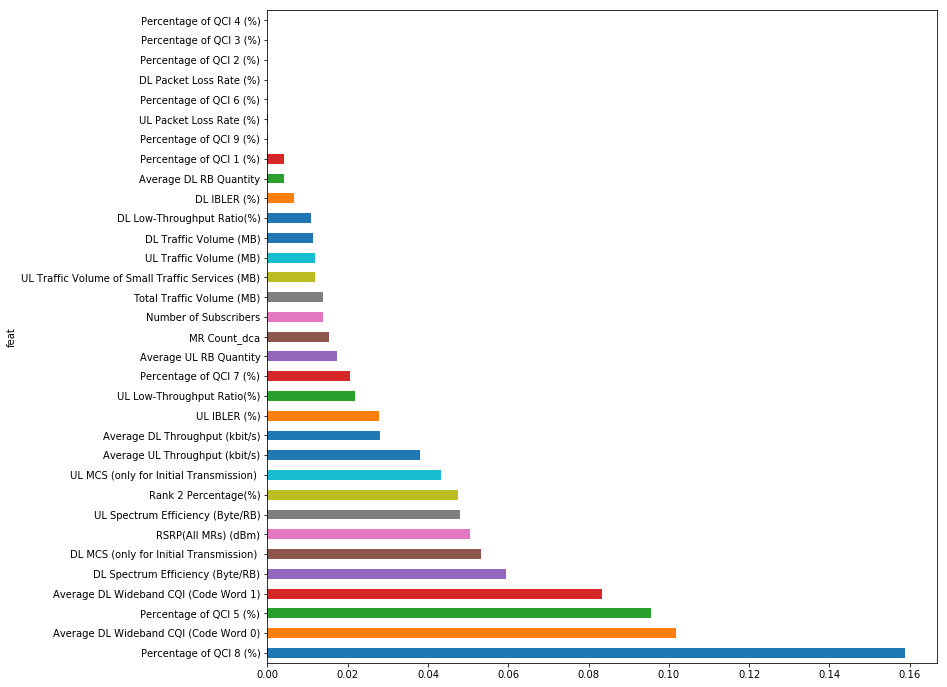

In [10]:
df_feat_imp.plot('feat','imp','barh',figsize=(12,12), legend=False)

In [11]:
df.head()

,Latitude,Longitude,RSRP(All MRs) (dBm),MR Count_dca,DL Traffic Volume (MB),UL Traffic Volume (MB),Total Traffic Volume (MB),UL Traffic Volume of Small Traffic Services (MB),Average DL Throughput (kbit/s),DL Low-Throughput Ratio(%),Average UL Throughput (kbit/s),UL Low-Throughput Ratio(%),DL Packet Loss Rate (%),UL Packet Loss Rate (%),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),Average DL Wideband CQI (Code Word 0),Average DL Wideband CQI (Code Word 1),DL Spectrum Efficiency (Byte/RB),UL Spectrum Efficiency (Byte/RB),Average DL RB Quantity,Average UL RB Quantity,Rank 2 Percentage(%),Number of Subscribers,Percentage of QCI 1 (%),Percentage of QCI 2 (%),Percentage of QCI 3 (%),Percentage of QCI 4 (%),Percentage of QCI 5 (%),Percentage of QCI 6 (%),Percentage of QCI 7 (%),Percentage of QCI 8 (%),Percentage of QCI 9 (%),cluster
0,13.461036,100.858384,-103.0,1,0.009,0.031,0.040,0.004,1837.499,100.00,3348.880,0.0,0.0,0.0,46.04,6.80,7,5,5.0,9.0,1.62,9.20,15.0,22.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0
1,13.461486,100.848189,-95.0,1,0.002,0.004,0.006,0.003,2992.187,100.00,13164.062,0.0,0.0,0.0,76.54,8.65,1,16,6.0,4.0,0.32,14.94,18.0,3.0,0.00,0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0
2,13.461486,100.851897,-104.0,1,0.000,0.000,0.000,0.000,8392.336,45.81,3589.113,16.3,0.0,0.0,76.19,20.00,1,25,9.0,9.0,0.02,0.00,11.0,1.0,0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0
3,13.461486,100.863018,-83.5,2,0.704,0.062,0.766,0.053,9197.544,0.00,12480.468,0.0,0.0,0.0,18.30,0.77,10,27,6.0,6.0,18.69,36.53,31.0,1.0,0.48,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1
4,13.461935,100.864408,-94.0,1,0.000,0.000,0.000,0.000,8392.336,45.81,3589.113,16.3,0.0,0.0,6.90,12.50,2,23,5.0,9.0,0.79,0.00,6.0,1.0,93.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1


In [12]:
dfCluster = df.drop(['Latitude','Longitude'],axis=1).groupby('cluster', as_index=False).mean()
dfCluster['NO_GRID'] = df.drop(['Longitude'],axis=1)[['Latitude','cluster']].groupby('cluster').count()[['Latitude']]
dfCluster

,cluster,RSRP(All MRs) (dBm),MR Count_dca,DL Traffic Volume (MB),UL Traffic Volume (MB),Total Traffic Volume (MB),UL Traffic Volume of Small Traffic Services (MB),Average DL Throughput (kbit/s),DL Low-Throughput Ratio(%),Average UL Throughput (kbit/s),UL Low-Throughput Ratio(%),DL Packet Loss Rate (%),UL Packet Loss Rate (%),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),Average DL Wideband CQI (Code Word 0),Average DL Wideband CQI (Code Word 1),DL Spectrum Efficiency (Byte/RB),UL Spectrum Efficiency (Byte/RB),Average DL RB Quantity,Average UL RB Quantity,Rank 2 Percentage(%),Number of Subscribers,Percentage of QCI 1 (%),Percentage of QCI 2 (%),Percentage of QCI 3 (%),Percentage of QCI 4 (%),Percentage of QCI 5 (%),Percentage of QCI 6 (%),Percentage of QCI 7 (%),Percentage of QCI 8 (%),Percentage of QCI 9 (%),NO_GRID
0,0,-103.985120,2.049064e+02,31.371220,3.166167,34.537392,1.915121,5463.802638,62.768615,1738.183391,38.254138,0.023689,0.012889,20.417029,13.465705,7.596384,15.928029,6.895275,6.944352,14.293467,10.991337,21.058540,3.050051,11.829341,15.034960,0.574492,0.000171,0.000000e+00,0.0,10.204484,0.052432,7.802581,81.166863,0.198962,155980
1,1,-98.964413,6.792974e+02,131.025666,11.238395,142.264062,8.478913,7298.025973,49.717117,3082.262035,17.255720,0.000940,0.001343,14.172872,6.839896,11.201459,23.507453,8.290234,7.886305,24.587102,19.731361,21.337912,2.389076,22.239704,39.647348,0.116509,0.000013,0.000000e+00,0.0,6.823675,0.002352,3.267031,89.776960,0.013407,573844
2,2,-81.051807,2.372666e+06,375590.966398,43743.893904,419334.860241,27760.892843,17376.268253,37.821084,5617.258145,13.845181,0.002651,0.003012,10.841446,5.454217,18.036145,25.626506,11.722892,11.566265,50.004096,32.110602,14.457831,3.879518,43.506506,12319.373494,0.319518,0.000120,0.000000e+00,0.0,30.555181,0.060361,7.667108,61.036988,0.360241,83
3,3,-90.376703,6.703469e+03,1487.068834,130.316467,1617.385300,98.047122,11694.298614,41.278431,4690.130635,15.463210,0.001412,0.000986,14.335197,4.920904,15.223828,25.068553,10.226913,10.153326,41.235039,27.469297,17.347342,2.719768,48.829604,279.861166,0.173704,0.000126,1.055907e-07,0.0,17.406266,0.006972,6.939687,75.434106,0.039035,568232
4,4,-96.666987,2.650074e+03,464.653647,41.757863,506.411511,29.072894,8510.304398,45.600113,3557.276147,16.697620,0.002216,0.001879,13.862025,7.293456,11.452838,23.457322,8.568441,8.303678,25.371294,19.574519,20.930888,3.643152,24.163958,160.594395,0.285941,0.000177,1.159178e-07,0.0,25.647070,0.009712,11.459292,62.536466,0.061261,603876
5,5,-94.620000,5.007000e+03,1371.814000,87.794000,1459.608000,58.015000,6796.400000,53.670000,3826.624000,19.790000,0.010000,0.000000,15.170000,7.340000,11.000000,25.000000,8.000000,8.000000,26.690000,22.520000,24.000000,5.000000,21.210000,299.000000,0.030000,0.000000,2.190000e+00,0.0,32.950000,0.000000,6.230000,58.560000,0.040000,1
6,6,-83.433584,2.100839e+05,45438.267122,4385.372405,49823.639517,3086.587495,12300.994166,41.809547,5028.811539,15.178376,0.001161,0.001064,13.350391,5.048125,15.387787,25.488915,10.482497,10.420653,40.348285,30.905194,17.619020,3.485414,43.206398,3746.162388,0.204817,0.000138,9.723843e-06,0.0,25.758928,0.028117,6.898399,66.925698,0.183485,5142


In [13]:
print('total grid-1:',len(df))
print('total grid-2:',np.sum(dfCluster.NO_GRID.sum()))

total grid-1: 1907158
total grid-2: 1907158


In [20]:
# excluding outlier cluster
cluster_exc = [2,5]
dfCluster = dfCluster.loc[~dfCluster.cluster.isin(cluster_exc)]

<Figure size 432x288 with 0 Axes>

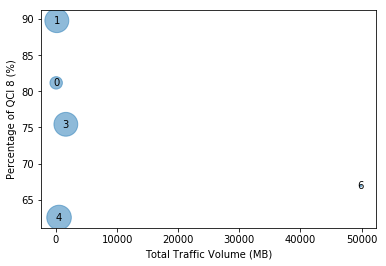

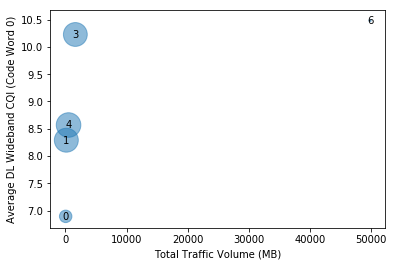

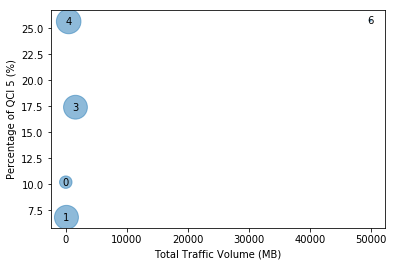

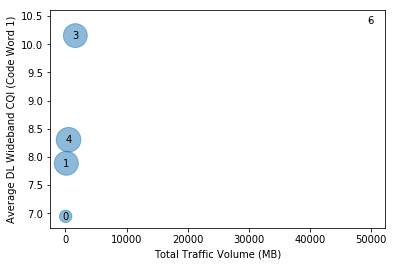

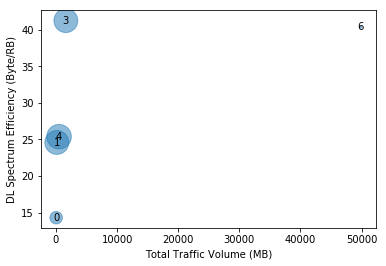

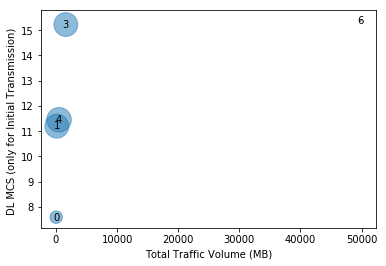

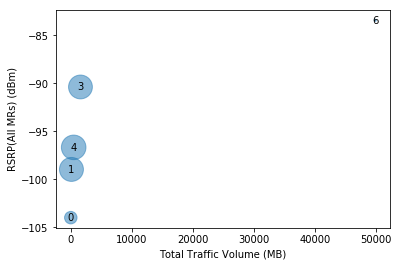

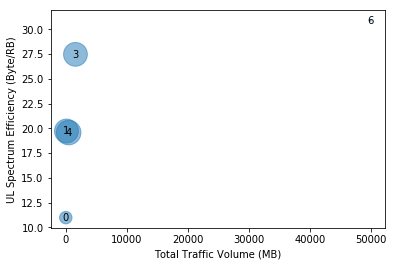

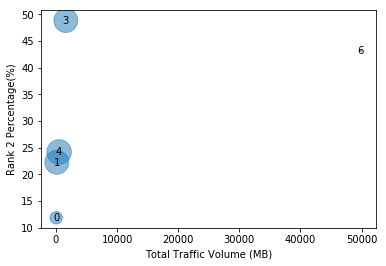

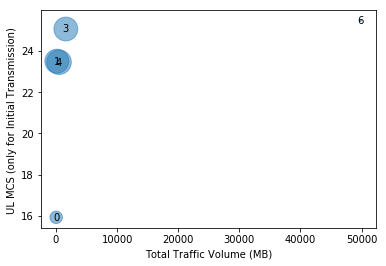

In [24]:
main_dimension = 'Total Traffic Volume (MB)'

for i,feat in enumerate(df_feat_imp.feat.values[:10]):
    
    plt.figure(i)
    fig, ax = plt.subplots()
    ax.scatter(dfCluster[main_dimension], dfCluster[feat], s=dfCluster.NO_GRID/1000, alpha = 0.5)
    ax.set_xlabel("Total Traffic Volume (MB)")
    ax.set_ylabel(feat)

    for c in dfCluster['cluster']:
        ax.annotate(c, (dfCluster['Total Traffic Volume (MB)'][c], dfCluster[feat][c]), horizontalalignment='center', verticalalignment='center')

In [ ]:
# now excluding cluster 6

<Figure size 432x288 with 0 Axes>

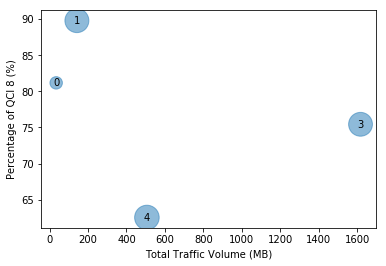

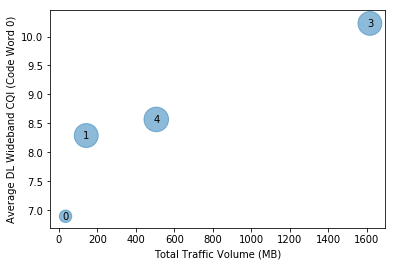

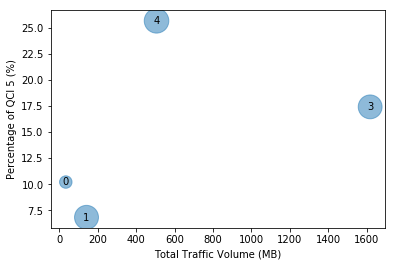

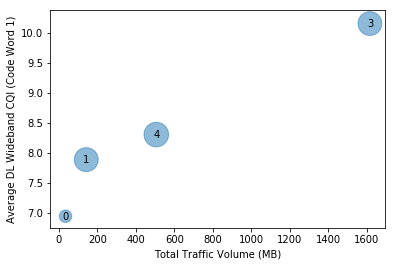

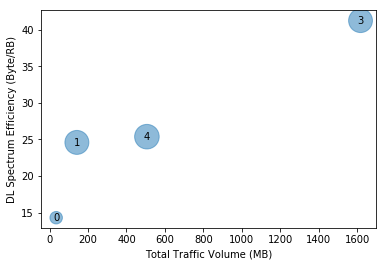

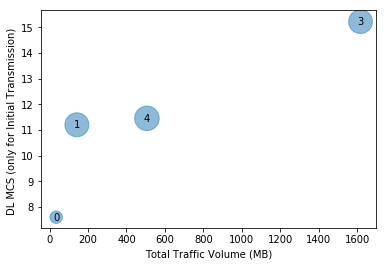

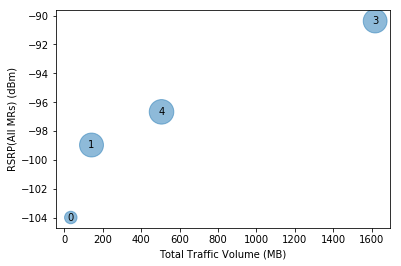

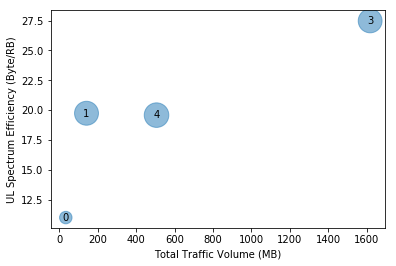

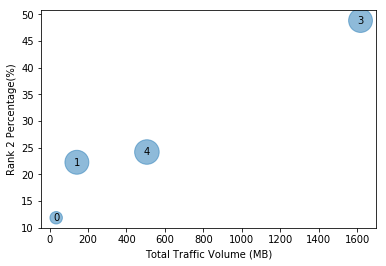

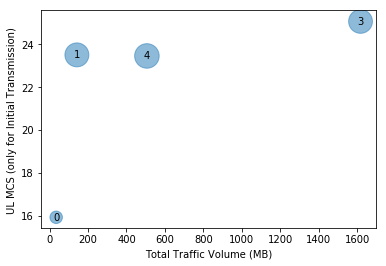

In [25]:
main_dimension = 'Total Traffic Volume (MB)'

dfCluster_filt = dfCluster.loc[~dfCluster.cluster.isin([6])]

for i,feat in enumerate(df_feat_imp.feat.values[:10]):
    
    plt.figure(i)
    fig, ax = plt.subplots()
    ax.scatter(dfCluster_filt[main_dimension], dfCluster_filt[feat], s=dfCluster_filt.NO_GRID/1000, alpha = 0.5)
    ax.set_xlabel("Total Traffic Volume (MB)")
    ax.set_ylabel(feat)

    for c in dfCluster_filt['cluster']:
        ax.annotate(c, (dfCluster_filt['Total Traffic Volume (MB)'][c], dfCluster_filt[feat][c]), horizontalalignment='center', verticalalignment='center')